In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

divorce = pd.read_csv("divorce.csv", parse_dates=["marriage_date"])
display(divorce.head())
divorce.dtypes

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [3]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv("divorce.csv", parse_dates=["divorce_date", "dob_man", "dob_woman", "marriage_date"])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


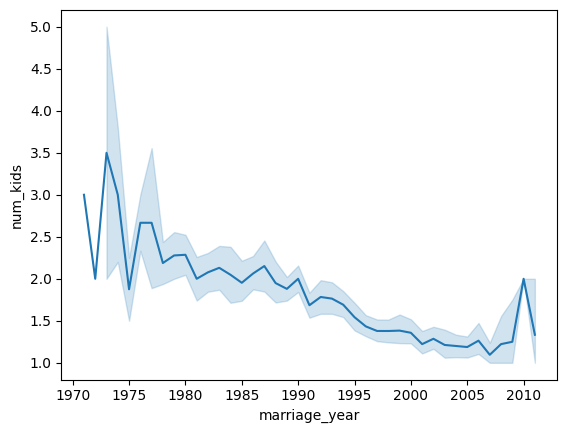

In [4]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

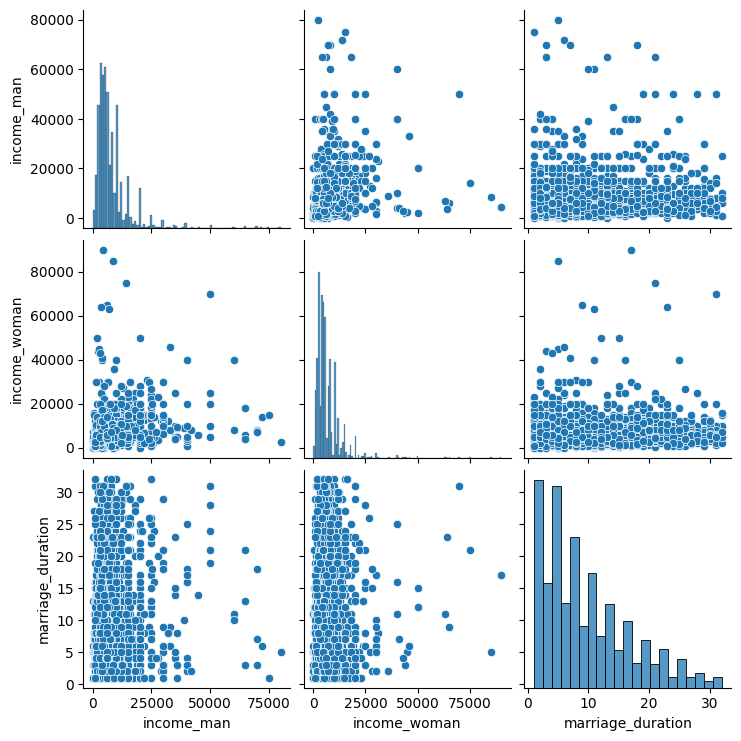

In [5]:
sns.pairplot(data=divorce, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()

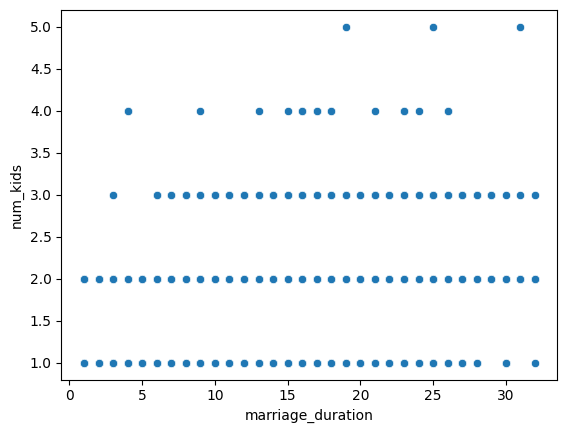

In [6]:
# Create the scatterplot
sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.show()

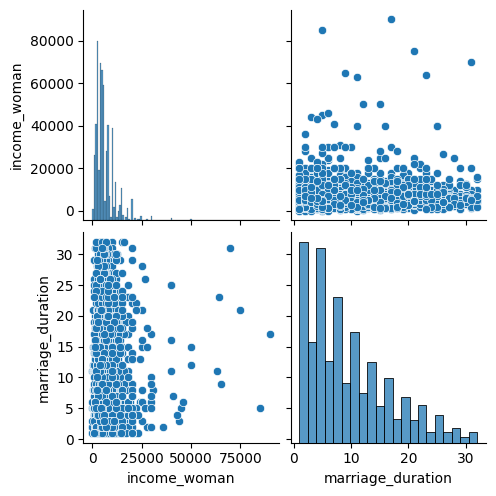

In [7]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=["income_woman", "marriage_duration"])
plt.show()

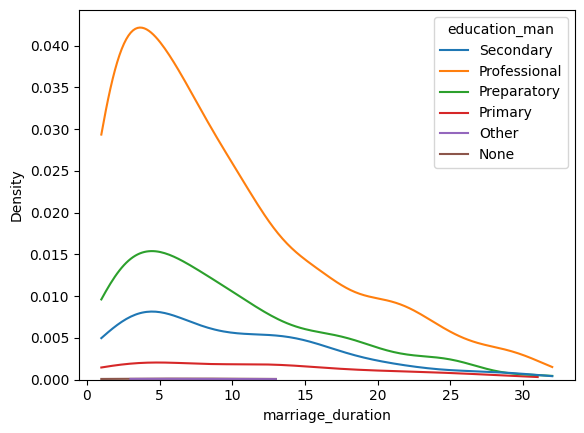

In [8]:
# Plot only the kde for values > 0
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()

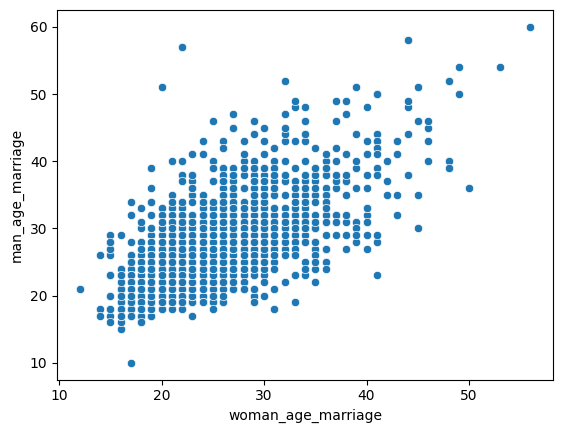

In [9]:
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year

# Scatter plot with the categorical variables
sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage")
plt.show()

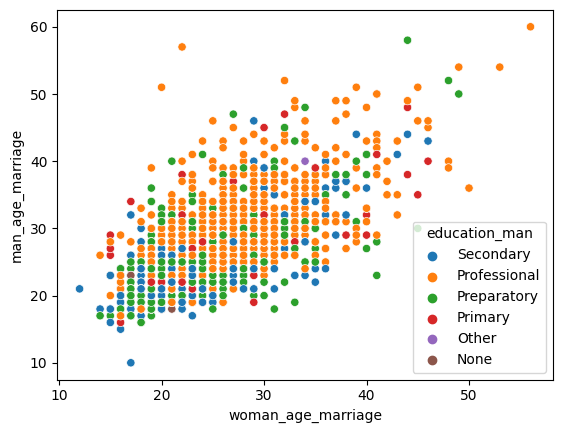

In [10]:
# Adding the education_man as hue
sns.scatterplot(data=divorce,
                            x="woman_age_marriage",
                            y="man_age_marriage",
                            hue="education_man")
plt.show()

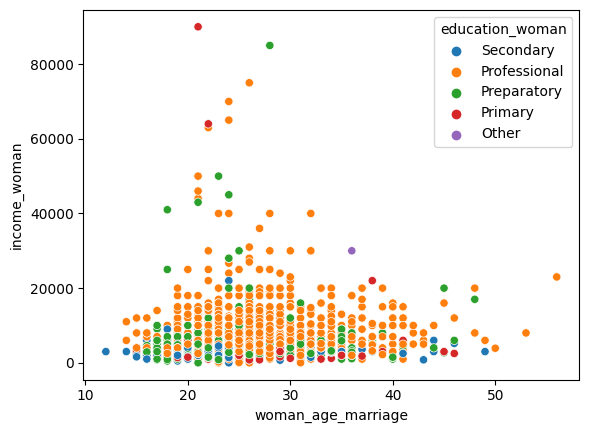

In [11]:
# Create the scatter plot
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

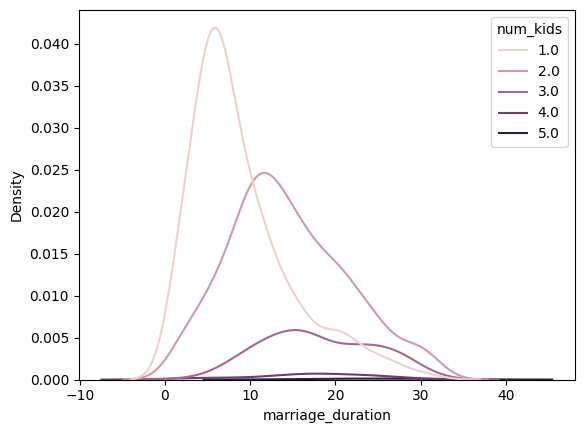

In [12]:
# Create the KDE plot
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids")
plt.show()

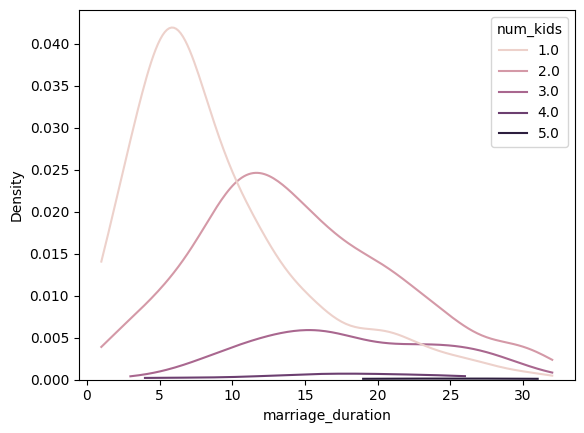

In [13]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

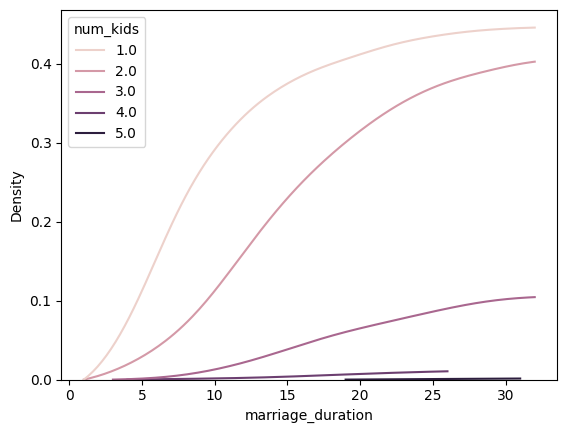

In [14]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()